conda install numpy  
conda install pandas  
conda install matplotlib  
conda install ffmpeg  
pip install pydub  
conda install -c conda-forge librosa  
pip install SpeechRecognition  
pip install -U scikit-learn  
conda install -c anaconda nltk

In [1]:
import pydub
import pandas as pd
pydub.AudioSegment.converter = r"C:/Users/Kinza/anaconda3/envs/pie/Library/bin/ffmpeg.exe" #CHANGE THIS

# Data loading

In [61]:
from audio_utils import load_audios

video_folder = 'videos/'

audios = load_audios(video_folder)

# Split on questions

In [13]:
from audio_utils import split_pauses

df = pandas.re

# Detect pauses

In [55]:
from audio_utils import pauses_features

In [56]:
filenames = os.listdir('videos/')
filenames = list(map(lambda s: s.split('.mp4',2)[0],filenames))

audio = pydub.AudioSegment.from_file('videos/'+filenames[0]+'.mp4',)
pauses(audio)

(2, 4, 3.0, 251)

# Acoustic feature extraction

Some widely used features include Amplitude Envelope, Zero-Crossing Rate (ZCR), Root Mean Square (RMS) Energy, Spectral Centroid, Band Energy Ratio, and Spectral Bandwidth.

In [43]:
import librosa
import librosa.display
import numpy as np

def acoustic_features(filename):
    y , sr = librosa.load('audios/'+filename+'.wav', sr=None) #time series x , and sr is a sampling rate of x
    
    rmse = librosa.feature.rms(y=y)
    # Spectral centroid
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    # Spectral bandwidth
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    # Spectral rolloff
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    # Zero crossing rate
    zcr = librosa.feature.zero_crossing_rate(y)
    # Mel-Frequency Cepstral Coefficients(MFCCs)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    # Chroma features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    to_append = [np.mean(chroma_stft), np.mean(rmse), np.mean(spec_cent), np.mean(spec_bw),np.mean(rolloff),np.mean(zcr)]    
    for e in mfcc:
        to_append.append(np.mean(e))

    return to_append

In [ ]:
filenames = os.listdir('audios/')
filenames = list(map(lambda s: s.split('.wav',2)[0],filenames))
features = list(map(acoustic_features,filenames))

In [45]:
import pandas as pd

features = pd.DataFrame(features)
features.columns = ['chroma_stft','rms','spec_cent','spec_bw','rolloff','zcr']+['mfcc_'+str(i) for i in range(20)]
features.index = map(lambda s : s.split('@')[0],filenames)
features.to_csv('features.csv')

In [35]:
import pandas as pd

features = pd.read_csv('features.csv',index_col=0)
features.index = map(lambda s : s.split('@')[0],filenames)

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0).fit(features)
features['classes'] = kmeans.predict(features)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [26] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
     PC      feature   loading  type
0   PC1      rolloff  0.839730  best
1   PC2      spec_bw  0.918554  best
2   PC2  chroma_stft  0.000078  weak
3   PC2          rms -0.000028  weak
4   PC1    spec_cent  0.386130  weak
5   PC2          zcr -0.000021  weak
6   PC2       mfcc_0  0.007850  weak
7   PC2       mfcc_1  0.021099  weak
8   PC2       mfcc_2  0.029624  weak
9   PC2       mfcc_3 -0.009321  weak
10  PC2       mfcc_4 -0.003612  weak
11  PC2       mfcc_5  0.028252  weak
12  PC2       mfcc_6  0.023692  weak
13  PC2       mfcc_7  0.011102  weak
14  PC2       mfcc_8  0.014940  weak
15  PC2       mfcc_9 -0.008211  weak
16  PC2      m

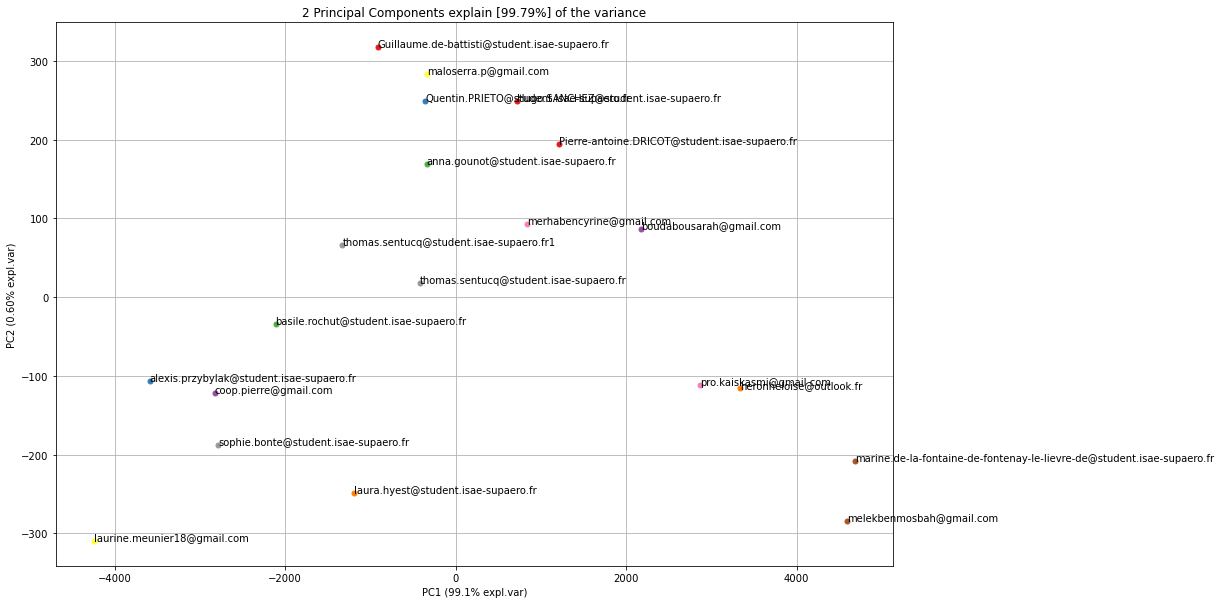

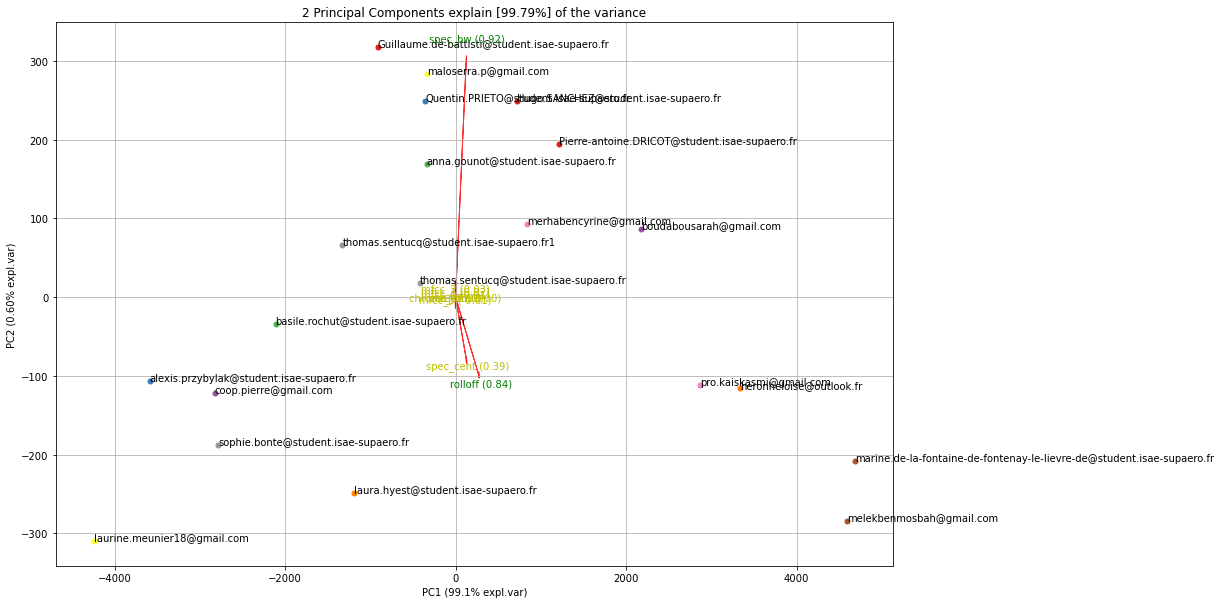

In [18]:
from pca import pca

model = pca(n_components=2)

# Fit transform
features_pca = model.fit_transform(features.drop('classes',axis=1))

print(model.compute_topfeat())

# Scatter first 2 PCs
fig, ax = model.scatter(legend=False)

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=10,legend=False)

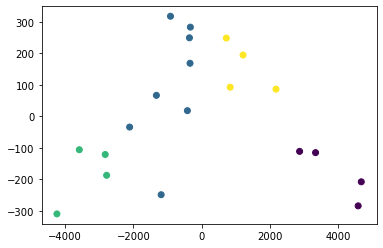

In [34]:
import matplotlib.pyplot as plt
plt.scatter(features_pca['PC']['PC1'],features_pca['PC']['PC2'],c=features['classes'])